# **LAB 3 - PART 1 SVM Kernel Hard Prediction**

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### **Read csv file**

In [362]:
### START CODE HERE ###
df = pd.read_csv("./data_sample.csv")
df.columns
### END CODE HERE ###

Index(['Target', 'Radius', 'Texture'], dtype='object')

#### **Split the data for Train and Test**
First 5 rows for train and the rest for test.

Split targets and feature as y and x respectively.
- `y` : `Target`
- `x` : `Radius,Texture`

In [363]:
AT = 5
X= df[["Radius", "Texture"]]
Y= df["Target"]
x_train=X.iloc[0:AT]
x_test = X.iloc[AT:]
y_train = Y.iloc[0:AT]
y_test = Y.iloc[AT:]

### **Create and observe the kernel behavior**

Here is the kernel function.
$$K_i(x_j,x_i) = exp(-\gamma||x_j-x_i||^2)$$
After obtaining the kernel values, you will perform a 3D visualization of $(x_1,x_2,K_i)$.

**Create the function that return all kernels as a list.**

In [364]:
def matrix_calculate_kernel(x, x_train, gamma=1):
    a = x.to_numpy()
    b = x_train.to_numpy()
    kernels = []
    for i in range(len(a)):
        kernel = []
        for j in range(len(b)):
            kernel.append(np.exp(gamma * -np.linalg.norm(a[i] - b[j])**2))
        kernels.append(kernel)
    return kernels



<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

It is not necessary to print the output like this. Simply compare the values obtained with the expected results.
- Kernel 1 :`[1.00000000e+00 1.68638147e-01 1.31720301e-06 1.65298888e-01 1.16785670e-02]`
- Kernel 2 :`[1.68638147e-01 1.00000000e+00 1.68752986e-09 1.20342323e-02 9.44523667e-06]`
- Kernel 3 :`[1.31720301e-06 1.68752986e-09 1.00000000e+00 2.85124368e-03 3.28082741e-07]`
- Kernel 4 :`[0.16529889 0.01203423 0.00285124 1.         0.00119453]`
- Kernel 5 :`[1.16785670e-02 9.44523667e-06 3.28082741e-07 1.19453296e-03 1.00000000e+00]`

</details>



In [365]:
matrix_calculate_kernel(x_train,x_train)

[[1.0,
  0.16863814726859555,
  1.317203011707747e-06,
  0.16529888822158664,
  0.011678566970395453],
 [0.16863814726859555,
  1.0,
  1.6875298575085319e-09,
  0.012034232284723775,
  9.445236666432097e-06],
 [1.317203011707747e-06,
  1.6875298575085319e-09,
  1.0,
  0.0028512436826796323,
  3.2808274140285713e-07],
 [0.16529888822158664,
  0.012034232284723775,
  0.0028512436826796323,
  1.0,
  0.0011945329581411741],
 [0.011678566970395453,
  9.445236666432097e-06,
  3.2808274140285713e-07,
  0.0011945329581411741,
  1.0]]

Use the weight ($\theta_{1-n}$) and bias ($\theta_{0}$) base on your activity last.

In [366]:
kernels_train = matrix_calculate_kernel(x_train,x_train)
### START CODE HERE ###
w = [ 1, -5, 2, -2, 1 ]
b = 1
### END CODE HERE ###

Create the `compare_3dplot` function to plot difference raw kernels $(x_1,x_2,K_i)$ and weighted kernels $(x_1,x_2,\theta_i K_i)$.<br>
**NOTE** : Plot as subplots, and in each subplot, also plot $(x_1,x_2,0)$  with a different color to visualize the $(x_1,x_2)$ before applying the kernel.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- There is a parameter : `projection='3d'`
</details>

<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

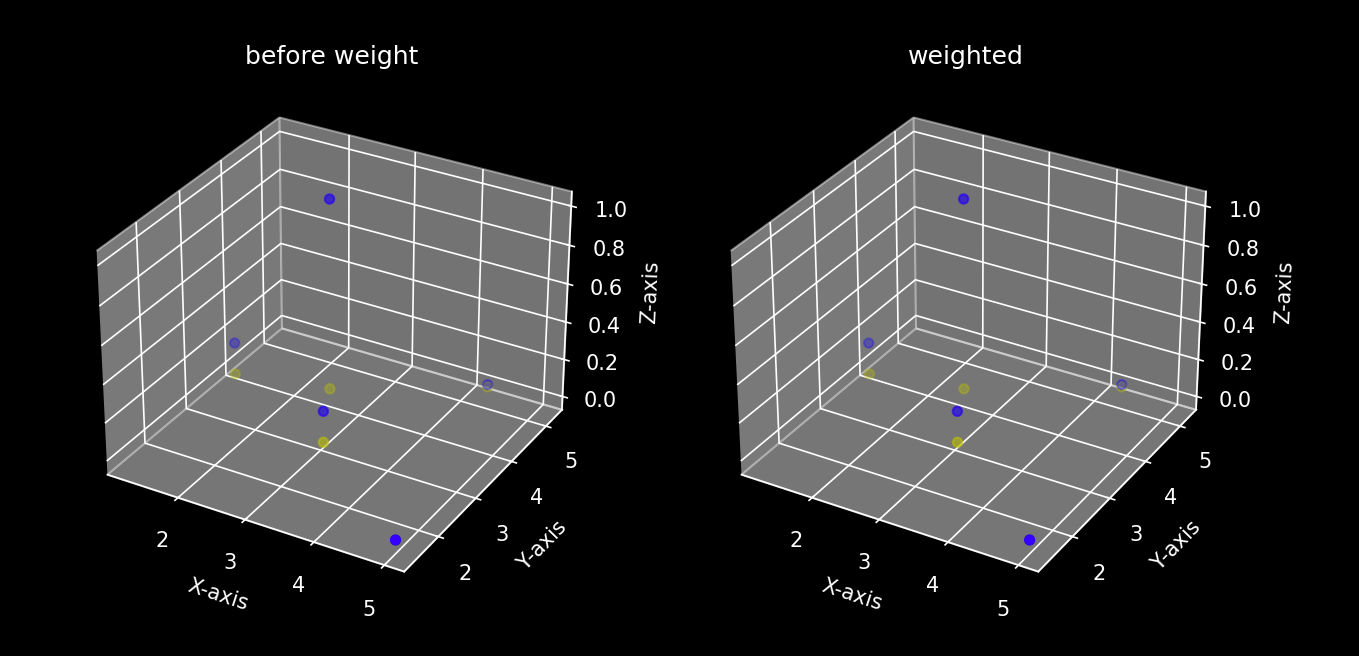

</details>


In [367]:
def compare_3dplot(x_train, kernels, w):
    """
    Parameters:
    - x_train (numpy.ndarray): The input training data.
    - kernels (numpy.ndarray): The array of kernel values.
    - w (float): The weight parameter.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': '3d'})

    # Plot raw kernel
    ax1.scatter(x_train["Radius"], x_train["Texture"], np.array( kernels ), c='blue', label='Raw Kernel')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('Kernel Value')
    ax1.legend()

    # Plot weighted kernel
    ax2.scatter(x_train["Radius"], x_train["Texture"], w * np.array( kernels ), c='red', label='Weighted Kernel')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_zlabel('Weighted Kernel Value')
    ax2.legend()

    plt.show()


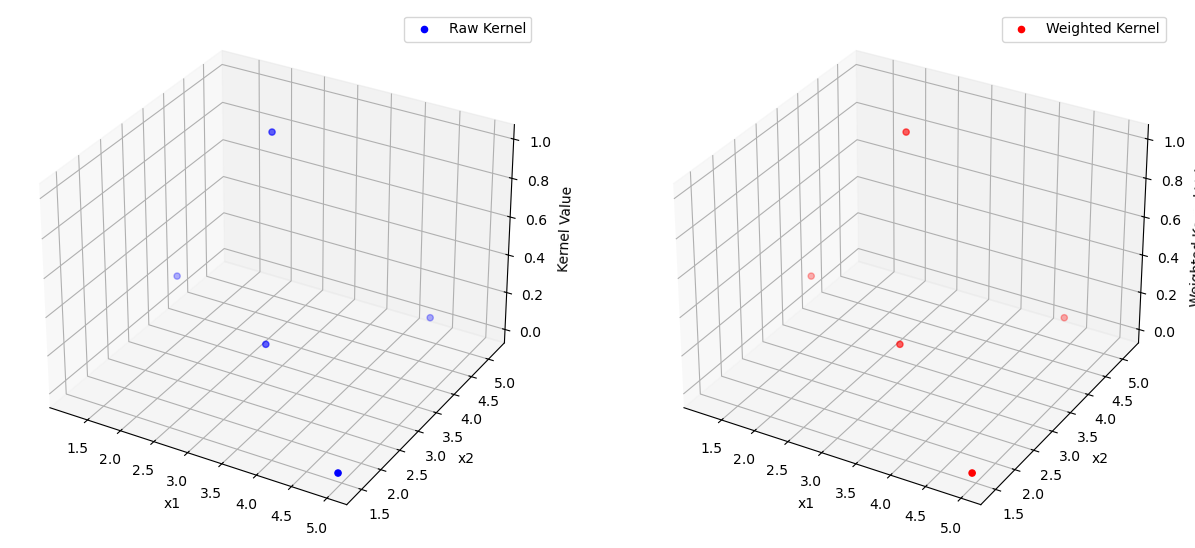

In [368]:
compare_3dplot(x_train,kernels_train[0],w[0])

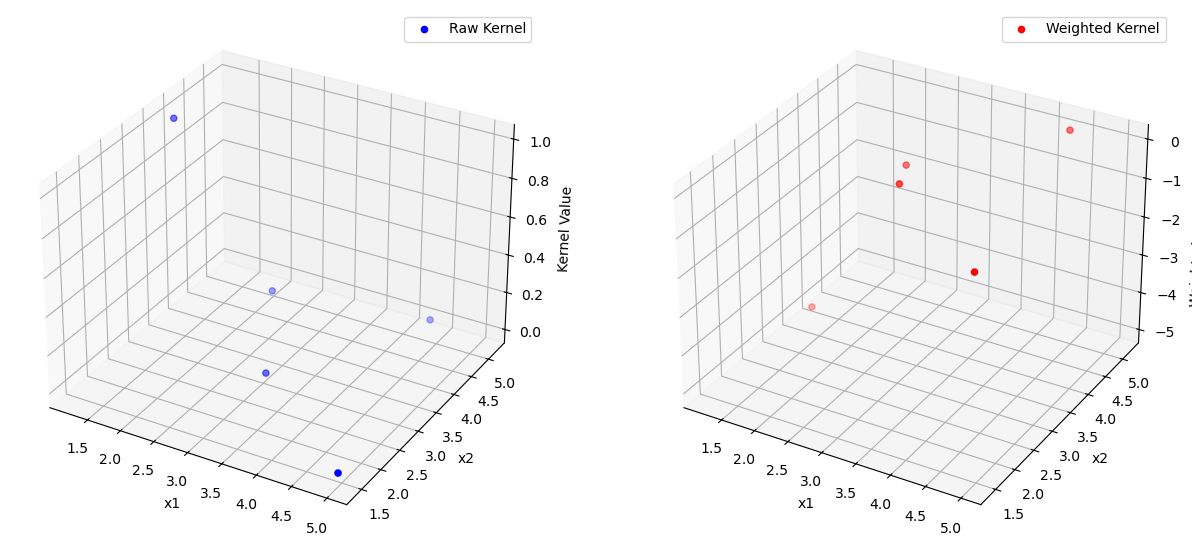

In [369]:
compare_3dplot(x_train,kernels_train[1],w[1])

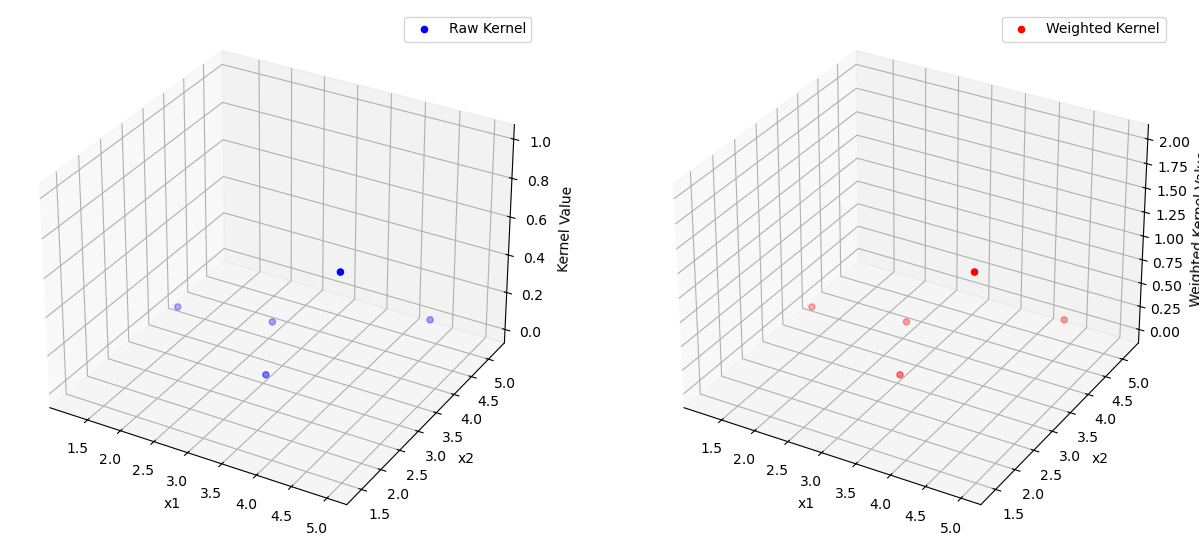

In [370]:
compare_3dplot(x_train,kernels_train[2],w[2])

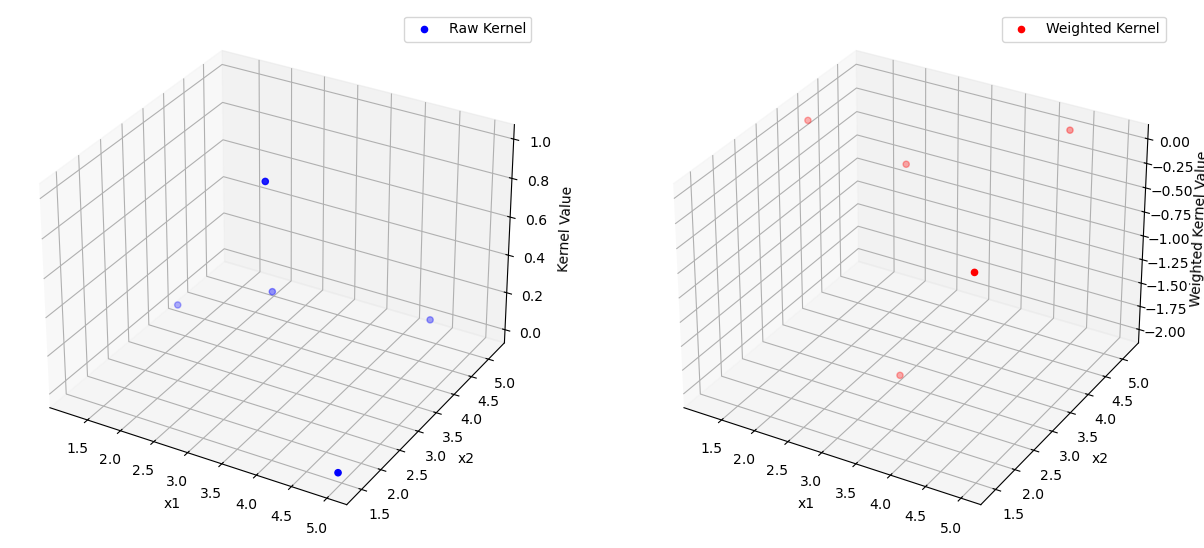

In [371]:
compare_3dplot(x_train,kernels_train[3],w[3])

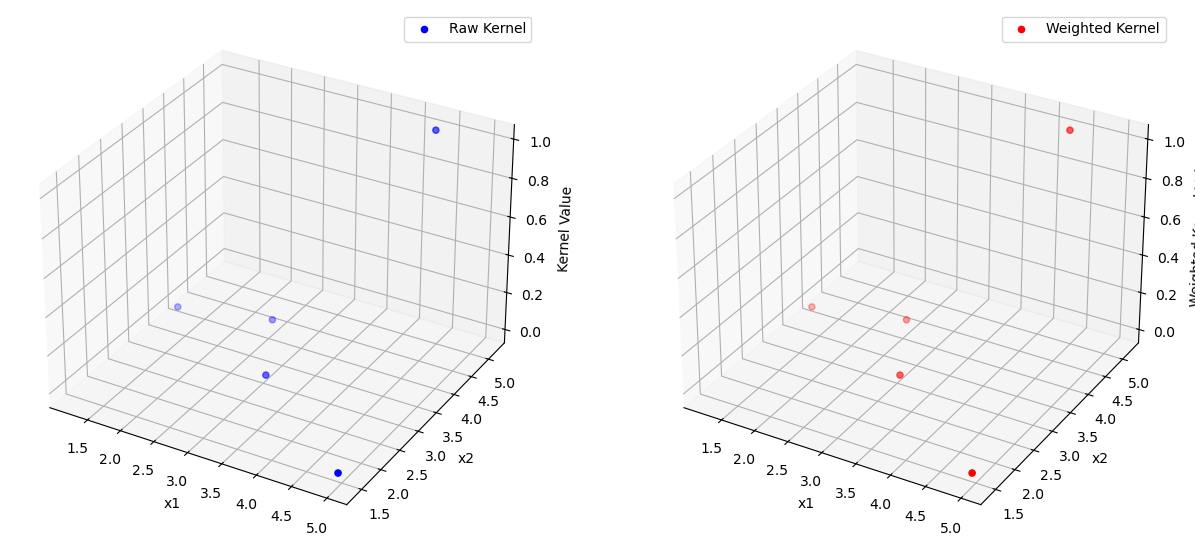

In [372]:
compare_3dplot(x_train,kernels_train[4],w[4])

### **SVM decision function**
Create the SVM decision function that return the predicted class.
$$
K_i(x_j,x_i) = exp(-\gamma||x_j-x_i||^2) \\
h(X) = \sum_{i=1}^N\theta_i K_i + \theta_0\\

\hat{Y} =
\begin{cases}
    1 &  h \geq 0 \\
    0 & \text{otherwise}
\end{cases}

$$


In [373]:
def svm_decision_function(x, x_train, w, b, gamma=1):
    """
    Predict the class of the input x using an SVM decision function.

    Parameters:
    - x (numpy.ndarray): The input data for prediction.
    - x_train (numpy.ndarray): The training data.
    - w (numpy.ndarray): The weight vector.
    - b (float): The bias term.
    - gamma (float): The gamma parameter for the RBF kernel (default is 1).

    Returns:
    - int: The predicted class (0 or 1).
    """
    
    ### START CODE HERE ###
    kernels = matrix_calculate_kernel(x, x_train,gamma)
    predict_val = [b + np.sum( np.array( w )*np.array( kernel )  ) for kernel in kernels]

    ### END CODE HERE ###
    return [1 if val >= 0 else 0 for val in predict_val ]

svm_decision_function(x_train, x_train, w, b)

[1, 0, 1, 0, 1]

### **Confusion matrix**
Create the confusion matrix from your prediction. Then, calculate the precision and recall values.<br><br>
<span style='color: red;'>**NOTE** : From scratch only.</span>


|            | Predicted Negative | Predicted Positive |
|------------|--------------------|--------------------|
| **Actual Negative** | True Negative (TN) | False Positive (FP) |
| **Actual Positive** | False Negative (FN) | True Positive (TP) |


$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.</br>

```
Confusion Matrix:
[[1 0]
[0 2]]
Precision: 1.0
Recall: 1.0
```

</details>

In [374]:
def make_confusion_matrix(y_true, y_pred):
    cm = [[0, 0], [0, 0]]
    for i in range(len(y_true)):
        pred = int( y_pred[i] )
        actual = int(y_true[i])
        cm[actual][pred] += 1
    return cm
def precision(cm):
    return cm[1][1] / (cm[1][1] + cm[0][1])
def recall(cm):
    return cm[1][1] / (cm[1][1] + cm[1][0])
def print_perf(y_true,y_pred):
    cm = make_confusion_matrix(y_true.to_list(), y_pred)
    print("confusion_matrix")
    print(cm)
    print("Precision", precision(cm))
    print("Recall", recall(cm))

y_pred = svm_decision_function(x_test, x_train, w, b)
print_perf(y_test,y_pred)
### END CODE HERE ###

confusion_matrix
[[1, 0], [0, 2]]
Precision 1.0
Recall 1.0


# Q2

In [375]:
y_pred_v2 = svm_decision_function(x_test, x_train, [0.2,0.4,0.1,-0.2,0.6], b)
print_perf(y_test,y_pred_v2)

confusion_matrix
[[0, 1], [0, 2]]
Precision 0.6666666666666666
Recall 1.0


### Question
1. What would happen if we choose fewer support vectors (number of kernels)?
2. If weights are changed to w = [0.2, 0.4, 0.1, -0.2, 0.6], what impact would this have on the classification results, and what is the underlying reason for the changes? 